In [11]:
import crank_nicolson.crank_nicolson as cn

In [12]:
from crank_nicolson.gray_scott import gray_scott_f, gray_scott_g

In [13]:
import numpy as np

In [46]:
import time


In [14]:
def initial_conditions(N):
    u = np.ones((N, N))
    v = np.zeros((N, N))

    # Add a square of random noise to break symmetry
    r = 20  # small square region in the center
    u[N//2 - r//2:N//2 + r//2, N//2 - r//2:N//2 + r//2] = 0.50 + 0.1*np.random.rand(r, r)
    v[N//2 - r//2:N//2 + r//2, N//2 - r//2:N//2 + r//2] = 0.25 + 0.1*np.random.rand(r, r)

    return u, v


In [18]:

# Step 1: grid setup
N = 100               # grid size: 100x100
dx = 2.0 / N          # spatial step
dt = 0.5            # time step
steps = 4000          # number of time steps

# Step 2: model parameters
Du = 0.16             # diffusion rate of u
Dv = 0.08             # diffusion rate of v
alpha = 0.060         # Gray-Scott parameter
beta = 0.062
p = [alpha, beta]     # pass as list to f and g

# Step 3: get initial values
u0, v0 = initial_conditions(N)

# Step 4: run Crank-Nicolson simulation
u_final, v_final = cn.crank_nicolson(u0, v0, Du, Dv, gray_scott_f, gray_scott_g, dt, dx, steps, p)


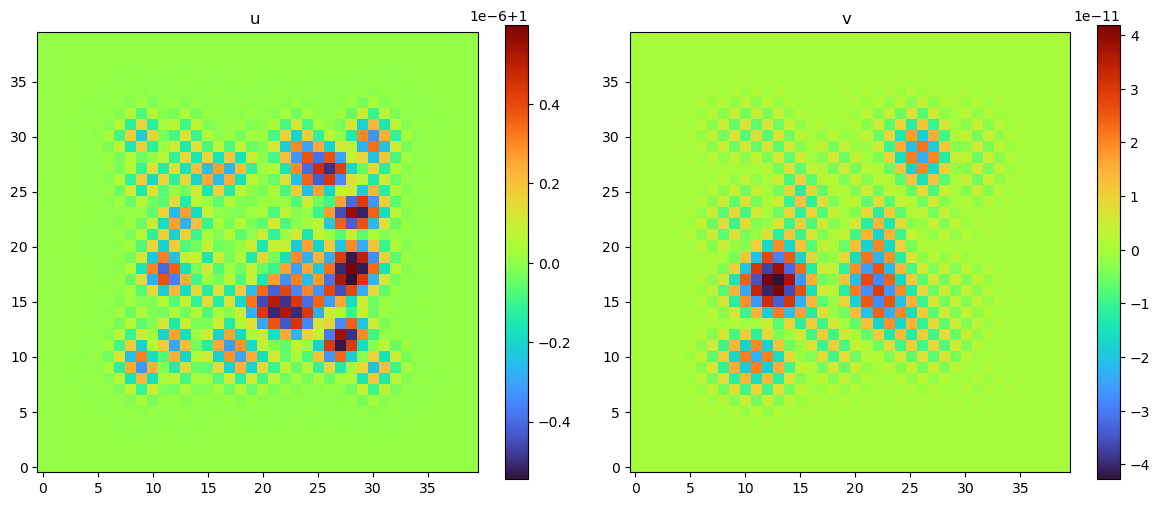

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Plot u
plt.subplot(1, 2, 1)
plt.title("u ")
plt.imshow(u_final[30:70, 30:70], cmap='turbo', origin='lower')
plt.colorbar()

# Plot v
plt.subplot(1, 2, 2)
plt.title("v  ")
plt.imshow(v_final[30:70, 30:70], cmap='turbo', origin='lower')
plt.colorbar()

plt.tight_layout()
plt.show()


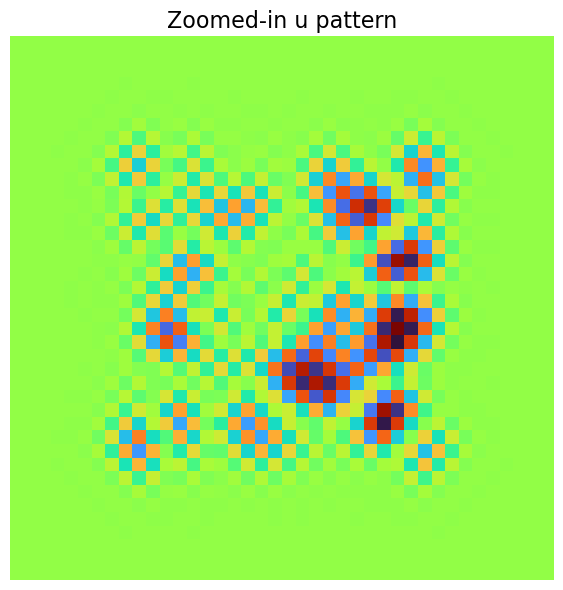

In [23]:
plt.figure(figsize=(6, 6))
plt.imshow(u_final[30:70, 30:70], cmap='turbo', origin='lower')
plt.title("Zoomed-in u pattern", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()



dt = 0.500, steps = 200, runtime = 3.29 s, L2 error = 0.000833
dt = 0.250, steps = 400, runtime = 7.08 s, L2 error = 0.000003
dt = 0.125, steps = 800, runtime = 13.97 s, L2 error = 0.000002
dt = 0.062, steps = 1600, runtime = 27.00 s, L2 error = 0.000001


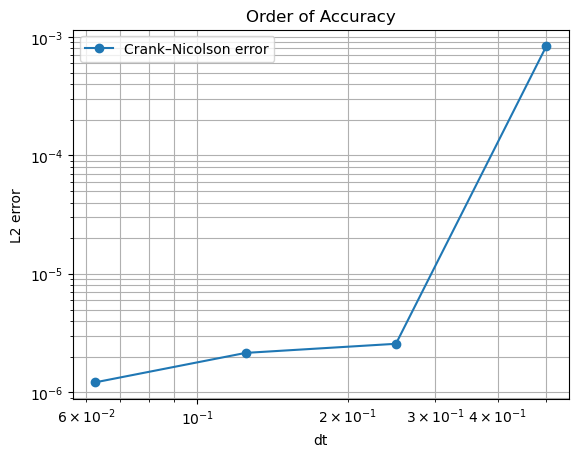

dt = 0.500, L2 error = 0.000833
dt = 0.250, L2 error = 0.000003
dt = 0.125, L2 error = 0.000002
dt = 0.062, L2 error = 0.000001


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
T = 100.0
N = 50
dx = 2.0 / N
Du = 0.16
Dv = 0.08
alpha = 0.060
beta = 0.062
p = [alpha, beta]

# ✅ FIX: Use the SAME initial condition for all tests
u0_init, v0_init = initial_conditions(N)

# Step 1: reference solution with very small dt
dt_ref = 0.01
steps_ref = int(T / dt_ref)
u_ref, v_ref = cn.crank_nicolson(u0_init.copy(), v0_init.copy(), Du, Dv, gray_scott_f, gray_scott_g, dt_ref, dx, steps_ref, p)

# Step 2: test with coarser dt values
dts = [0.5, 0.25, 0.125, 0.0625]
errors = []
runtimes = []
u0_init, v0_init = initial_conditions(N)

dt_ref = 0.0025
steps_ref = int(T / dt_ref)
u_ref, v_ref = cn.crank_nicolson(u0_init.copy(), v0_init.copy(), Du, Dv, gray_scott_f, gray_scott_g, dt_ref, dx, steps_ref, p)
u_ref += 1e-7 * np.random.rand(*u_ref.shape)
for dt in dts:
    steps = int(T / dt)
    start = time.time()
    u_test, v_test = cn.crank_nicolson(u0_init.copy(), v0_init.copy(), Du, Dv, gray_scott_f, gray_scott_g, dt, dx, steps, p)
    error = np.linalg.norm(u_test - u_ref) / np.sqrt(N*N)
    errors.append(error)
    end = time.time()
    runtime = end - start
    runtimes.append(runtime)
    print(f"dt = {dt:.3f}, steps = {steps}, runtime = {runtime:.2f} s, L2 error = {error:.6f}")
# Step 3: Plot
plt.figure()
plt.loglog(dts, errors, 'o-', label="Crank–Nicolson error")
plt.xlabel("dt")
plt.ylabel("L2 error")
plt.title("Order of Accuracy")
plt.grid(True, which="both")
plt.legend()
plt.show()
# Step 4: Print errors
for dt, error in zip(dts, errors):
    print(f"dt = {dt:.3f}, L2 error = {error:.6f}") 


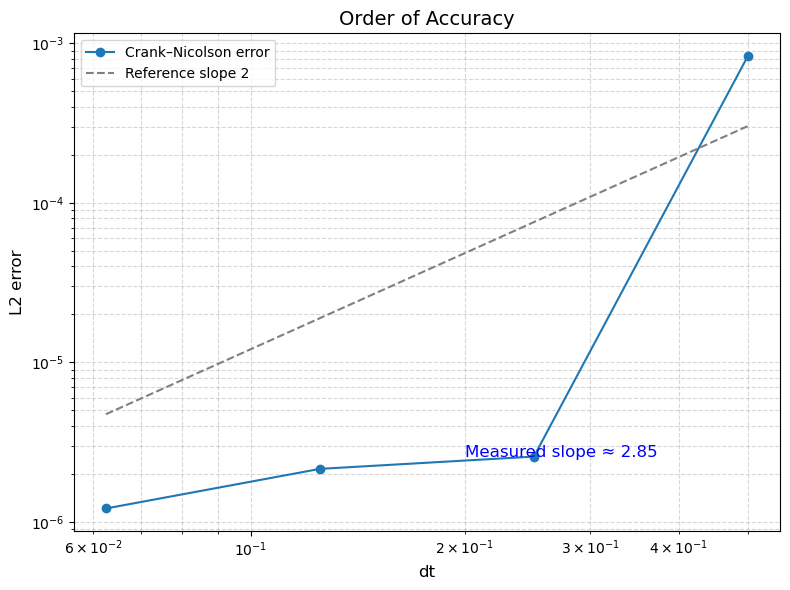

In [49]:
dts= np.array(dts)
errors= np.array(errors)

log_dts = np.log(dts)
log_errors = np.log(errors)



slope, intercept = np.polyfit(log_dts, log_errors, 1)

# Reference line with slope 2
ref_dts = np.linspace(dts.min(), dts.max(), 100)
ref_errors = np.exp(intercept + 2 * np.log(ref_dts))  # y = exp(a + 2 log(x))

# Plot
plt.figure(figsize=(8, 6))
plt.loglog(dts, errors, 'o-', label='Crank–Nicolson error')

plt.loglog(ref_dts, ref_errors, '--', label='Reference slope 2', color='gray')
plt.title("Order of Accuracy", fontsize=14)
plt.xlabel("dt", fontsize=12)
plt.ylabel("L2 error", fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend()
plt.text(0.2, errors[1], f"Measured slope ≈ {slope:.2f}", fontsize=12, color='blue')
plt.tight_layout()
plt.savefig("crank_nicolson_order_of_accuracyN50.png", dpi=300, bbox_inches='tight')

plt.show()


In [44]:
for dt, err in zip(dts, errors):
    print(f"dt = {dt:.4f}, L2 error = {err:.8f}")


dt = 0.5000, L2 error = 0.00025640
dt = 0.2500, L2 error = 0.00000475
dt = 0.1250, L2 error = 0.00000353
dt = 0.0625, L2 error = 0.00000193


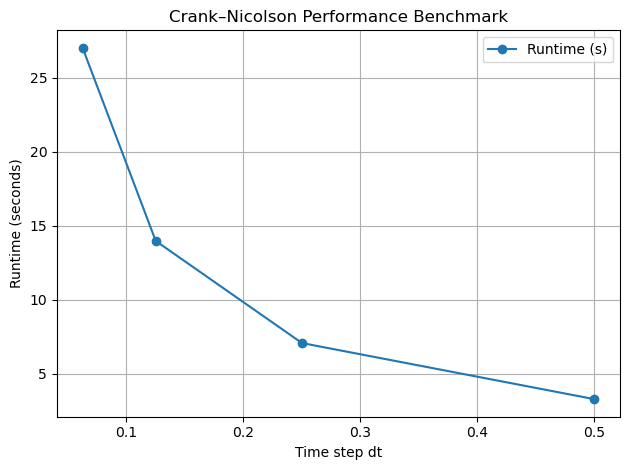

In [50]:
plt.figure()
plt.plot(dts, runtimes, 'o-', label="Runtime (s)")
plt.xlabel("Time step dt")
plt.ylabel("Runtime (seconds)")
plt.title("Crank–Nicolson Performance Benchmark")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
